<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Iris Data classification</h2>
</div>

## Table of contents 
1. Importing Libraries
2. Load Data
3. Understand the Data
4. Data Visualization
5. Train-Validation Split
6. Support Vector Machines with GridSearch CV
7. Random Forest with with GridSearch CV
8. KNN with with GridSearch CV
9. Logistic Regression with GridSearch CV
10. All Models with Stratified K-Fold
11. Conclusion

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>1. Importing Libraries</h2>
</div>

In [1]:
import requests
import sys
import datetime

import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
%run Iris_Python_PreProcessing.ipynb

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In [3]:
df = read_data()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Understanding Data </h2>

The Iris Data has 150 instances and 5 attributes with 4 Independent(Sepal length, Sepal Width, Petal length and Petal width) and one Dependent Variable (Species).

The numerical values of all 4 independent variables have the same scale (centimeters) and similar ranges between 0 and 8 centimeters. There are three duplicate observations so after removing the duplicates dataset size decreased to 147 instances. There are no null values found. Replacing a few Outliers with median instead of removing them as sample size if very small.

The Dependent Variable has three unique values with each has 50 instances, After removing duplicates, we have one class not more than 4% of other class. so usually depends on dataset when one class is 30% to 60% greater than other is considered class imbalance.

<AxesSubplot:>

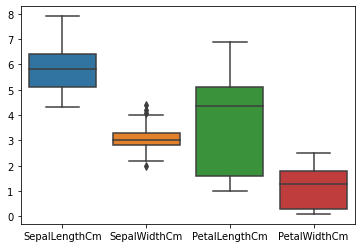

In [4]:
sns.boxplot(data=df.iloc[:,0:4])

In [5]:
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(remove_outlier)

In [6]:
df = duplicate_drop(df)

In [7]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     147.000000    147.000000     147.000000    147.000000
mean        5.856463      3.037415       3.780272      1.208844
std         0.829100      0.392779       1.759111      0.757874
min         4.300000      2.200000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.000000       6.900000      2.500000


In [8]:
#check class imbalances
print(df.groupby('Species').size())

Species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Visualization </h2>
</div>

Histogram shows two of the input variables have a Gaussian distribution. After replacing outliers with Median there are no outliers visible in Box plot. 
After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

Plotting BOX PLOT


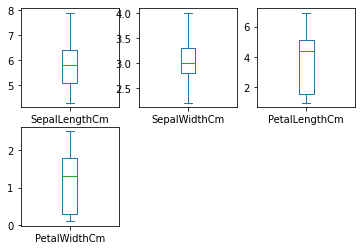

Plotting HISTOGRAM


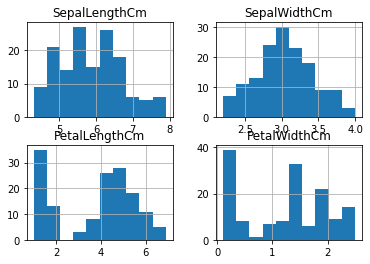

Plotting HEATMAP to see Correlations
Plotting Scatter Plot for data variations


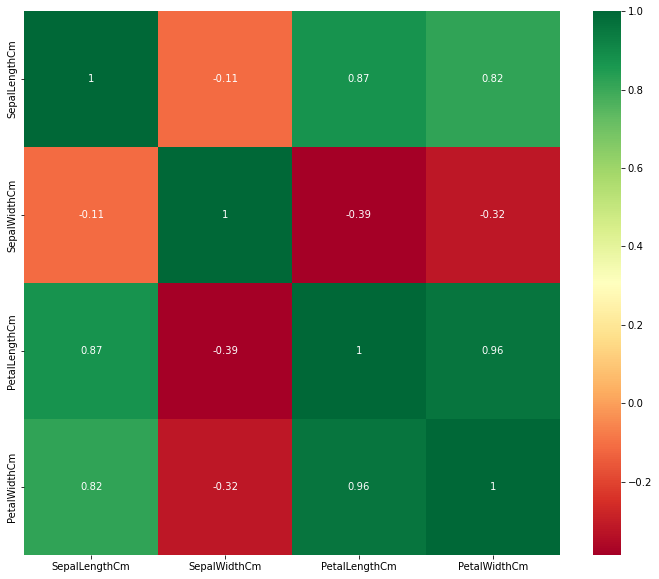

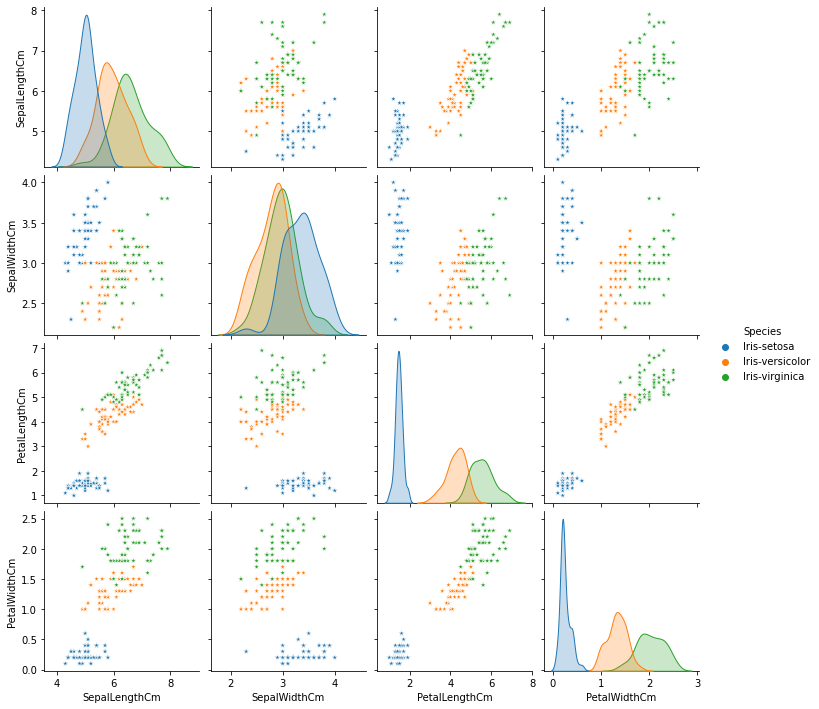

In [9]:
data_visualization(df)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Train-Validation Split </h2>
</div>

Splitting the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset

In [10]:
X_train, X_validation, Y_train, Y_validation = Data_split(df)

In [11]:
%run model_python_files/Iris_Python_SVM.ipynb
%run model_python_files/Iris_Python_RF.ipynb
%run model_python_files/Iris_Python_LGRG.ipynb
%run model_python_files/Iris_Python_KNN.ipynb
%run model_python_files/Iris_Python_Stratified_Kfold.ipynb

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Support Vector Machine with GridSearch CV </h2>
</div>

In [12]:
svm_time_start = datetime.datetime.now()
svm_main(X_train, Y_train, X_validation)
svm_time_end = datetime.datetime.now()

Accuracy Score with Validation Data:  0.9666666666666667
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Random Forest with GridSearch CV </h2>
</div>

In [13]:
rf_time_start = datetime.datetime.now()
rf_main(X_train, Y_train, X_validation)
rf_time_end = datetime.datetime.now()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy Score with Validation Data:  0.9666666666666667
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. KNN with GridSearch CV </h2>
</div>

In [14]:
knn_time_start = datetime.datetime.now()
knn_main(X_train, Y_train, X_validation)
knn_time_end = datetime.datetime.now()

Accuracy Score with Validation Data:  0.9333333333333333
[[ 8  0  0]
 [ 0  8  1]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>9. Logistic Regression with GridSearch CV </h2>
</div>

When Tried with Two Solvers Newton-cg and Liblinear clearly Liblinear has better Cross Valdiation Score with 0.9575 since our dataset is Pretty Small with size of just 150 Observations.

In [15]:
lrgrg_time_start = datetime.datetime.now()
lgrg_main(X_train, Y_train, X_validation)
lgrg_time_end = datetime.datetime.now()

Mean Cross Validation Score using solver newton-cg :  0.95
Mean Cross Validation Score using solver liblinear :  0.9575757575757574
Accuracy Score with Validation Data:  0.9666666666666667
[[ 8  0  0]
 [ 0  8  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>10. All Models with Stratified K-Fold </h2>
</div>

In [16]:
kfold_time_start = datetime.datetime.now()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.957576 (0.042478)
KNN: 0.975000 (0.053359)
RF: 0.949242 (0.067083)
SVM: 0.983333 (0.033333)


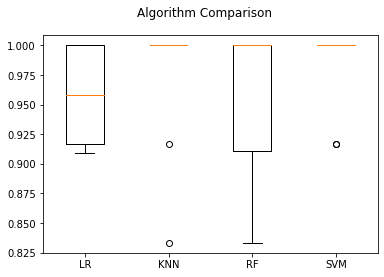

Model with Highest Accuracy :  SVM
Accuracy Score of SVM:  0.9666666666666667
[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [17]:
main(models, X_train, Y_train, X_validation, Y_validation)
kfold_time_end = datetime.datetime.now()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>11. Conclusion </h2>
</div>

Clearly the F1 score of Iris-Setosa is perfect 1 for all four models but other only SVM has better F1 score for other two Classes. No Matter where we used GridSearch CV or just Stratified K-fold the output of Support Vector Machine is Same.

As we can see below time to run models with Gridsearch CV is more than the time taken for all other Models with Stratified Kfold. Here our results are pretty similar no matter whether it is Stratified or Gridsearch so process which take shorter time to run and execute will be ideal for Production.

In [18]:
print('Time to Run SVM with Grid Search CV : ', svm_time_end - svm_time_start)
print('Time to Run Random Forest with Grid Search CV : ', rf_time_end - rf_time_start)
print('Time to Run KNN with Grid Search CV : ', knn_time_end - knn_time_start)
print('Time to Run Logistic Regression with Grid Search CV : ', lgrg_time_end - lrgrg_time_start)
print('Time to Run Stratified Kfold with all Models : ', kfold_time_end - kfold_time_start)

Time to Run SVM with Grid Search CV :  0:00:00.255330
Time to Run Random Forest with Grid Search CV :  0:00:42.458843
Time to Run KNN with Grid Search CV :  0:00:00.159447
Time to Run Logistic Regression with Grid Search CV :  0:00:00.099724
Time to Run Stratified Kfold with all Models :  0:00:00.744158
